In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
import numpy as np
import random
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm(vmin=1,vmax=200)}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kaon_pn_4GeV_Jul21_ntuple/*.root")


In [3]:
def extend_array(arr, new_attr, new_attr_name):
    members={n:arr[n] for n in arr.fields}
    members[new_attr_name] = new_attr
    return ak.zip(members)

def add_angle(arr,br=['px','py','pz','e'],name="theta"):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    arr = extend_array(arr, part.theta, name)
    return arr

def get_vector(arr):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    return part

def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
    try:
        return ak.to_numpy(ak.flatten(x,axis=axis)) 
    except:
        return x

In [4]:
def pz_smear(pz):
    pz_array = []
    for part in pz:
        for element in part:
            if element <= 50:
                pz_perc = random.gauss(1,0.0404);
            elif element <= 100: 
                pz_perc = random.gauss(1,0.0410);
            elif element <= 250: 
                pz_perc = random.gauss(1,0.0415);
            elif element <= 500: 
                pz_perc = random.gauss(1,0.0420);
            elif element <= 1000: 
                pz_perc = random.gauss(1,0.0435);
            elif element <= 2000:  
                pz_perc = random.gauss(1,0.0477);
            elif element <= 3000:  
                pz_perc = random.gauss(1,0.0523);
            elif element <= 4000:  
                pz_perc = random.gauss(1,0.0573);            
            else:    
                pz_perc = random.gauss(1,0.06);
            pz_array=np.append(pz_array, [pz_perc])
    return (pz_array)

def px1_smear(p):
    px_array = []
    for part in p:
        for element in part:
            if element <= 100:
                px_uncer = random.gauss(0,3.00);
            elif element <= 400: 
                px_uncer = random.gauss(0,3.20);
            elif element <= 500: 
                px_uncer = random.gauss(0,3.20);
            elif element <= 1000: 
                px_uncer = random.gauss(0,3.40);
            elif element <= 1300: 
                px_uncer = random.gauss(0,3.50);
            elif element <= 2000:  
                px_uncer = random.gauss(0,3.85);           
            else:    
                px_uncer = random.gauss(0,3.85);
            px_array=np.append(px_array, [px_uncer])
    return (px_array)

def px2_smear(p):
    px_array = []
    for part in p:
        for element in part:
            if element <= 100:
                px_uncer = random.gauss(0,3.00);
            elif element <= 400: 
                px_uncer = random.gauss(0,3.20);
            elif element <= 500: 
                px_uncer = random.gauss(0,3.20);
            elif element <= 1000: 
                px_uncer = random.gauss(0,3.40);
            elif element <= 1300: 
                px_uncer = random.gauss(0,3.50);
            elif element <= 2000:  
                px_uncer = random.gauss(0,3.85);           
            else:    
                px_uncer = random.gauss(0,3.85);
            px_array=np.append(px_array, [px_uncer])
    return (px_array)

def py1_smear(p):
    py_array = []
    for part in p:
        for element in part:
            if element <= 100:
                py_uncer = random.gauss(0,3.75);
            elif element <= 350: 
                py_uncer = random.gauss(0,3.80);
            elif element <= 500: 
                py_uncer = random.gauss(0,4.20);
            elif element <= 1000: 
                py_uncer = random.gauss(0,4.80);
            elif element <= 1200: 
                py_uncer = random.gauss(0,4.98);
            elif element <= 2000:  
                py_uncer = random.gauss(0,3.85);           
            else:    
                py_uncer = random.gauss(0,5.50);
            py_array=np.append(py_array, [py_uncer])
    return (py_array)

def py2_smear(p):
    py_array = []
    for part in p:
        for element in part:
            if element <= 100:
                py_uncer = random.gauss(0,3.75);
            elif element <= 350: 
                py_uncer = random.gauss(0,3.80);
            elif element <= 500: 
                py_uncer = random.gauss(0,4.20);
            elif element <= 1000: 
                py_uncer = random.gauss(0,4.80);
            elif element <= 1200: 
                py_uncer = random.gauss(0,4.98);
            elif element <= 2000:  
                py_uncer = random.gauss(0,3.85);           
            else:    
                py_uncer = random.gauss(0,5.50);
            py_array=np.append(py_array, [py_uncer])
    return (py_array)



In [5]:
hists = {}

hists["pi_e1"] = hist.Hist("Sim Particles",
                                hist.Bin("e", r"$\pi^\pm$ Kinetic Energy [MeV]", 80, 0, 3000), 
                            )  
hists["pi_e2"] = hist.Hist("Sim Particles",
                                hist.Bin("e", r"$\pi^\pm$ Kinetic Energy [MeV]", 80, 0, 3000), 
                            )  
hists["pi_e3"] = hist.Hist("Sim Particles",
                                hist.Bin("e", r"$\pi^\pm$ Kinetic Energy [MeV]", 80, 0, 3000), 
                            )
hists["pi_e4"] = hist.Hist("Sim Particles",
                                hist.Bin("e", r"$\pi^\pm$ Kinetic Energy [MeV]", 80, 0, 3000), 
                            )
hists["pi_e5"] = hist.Hist("Sim Particles",
                                hist.Bin("e", r"$\pi^\pm$ Kinetic Energy [MeV]", 80, 0, 3000), 
                            )

hists["pi_mass1"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"Reconstructed $K_s$ Mass [MeV]", 80, 400, 600), 
                            )  
hists["pi_mass2"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"Reconstructed $K_s$ Mass [MeV]", 80, 400, 600), 
                            )  
hists["pi_mass3"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"Reconstructed $K_s$ Mass [MeV]", 80, 400, 600), 
                            ) 
hists["pi_mass4"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"Reconstructed $K_s$ Mass [MeV]", 80, 400, 600), 
                            ) 
hists["pi_mass5"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"Reconstructed $K_s$ Mass [MeV]", 80, 400, 600), 
                            ) 
hists["kaone_hist"] = hist.Hist("Sim Pions",     
                                hist.Bin("k", r"Reconstructed $K_s$ Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )

In [6]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)
    
    #constant definitions
    klong_pdgid = 130
    kshort_pdgid = 310
    chargedpion_pdgid = 211
    pi_mass = 139
    kaon_mass = 497.648
 
    #select events
    sim_particle = ldmx_events['Sim_PNParticle']
    sim_particle_n = ldmx_events['n']['Sim_PNParticle']
    sim_particle_dau1 = ldmx_events['Sim_PNParticle_dau1']
    sim_particle_dau2 = ldmx_events['Sim_PNParticle_dau2']
    
    #sim kaon masks
    klong_mask = sim_particle.pdgID == 130
    kshort_mask = sim_particle.pdgID == 310
    decay_num_mask = sim_particle_dau2.momdecay == 2
    decay_mom_mask = sim_particle_dau2.mompdgID == 310
    decay_mask = decay_num_mask & decay_mom_mask
    
    #define vectors
    dau1 = get_vector(sim_particle_dau1[decay_mask])
    dau2 = get_vector(sim_particle_dau2[decay_mask])
    dausum = (dau1 + dau2)
    
    theta1_mask = (dau1.theta*180/math.pi <= 40)
    theta2_mask = (dau2.theta*180/math.pi <= 40)
    theta_mask = theta1_mask & theta2_mask

    #define vector kinematics

    new_px1 = px1_smear(dau1[theta_mask].p)+flat(dau1[theta_mask].px)
    new_px2 = px2_smear(dau2[theta_mask].p)+flat(dau2[theta_mask].px)
    new_py1 = py1_smear(dau1[theta_mask].p)+flat(dau1[theta_mask].py)
    new_py2 = py2_smear(dau2[theta_mask].p)+flat(dau2[theta_mask].py)
    new_pz1 = pz_smear(dau1[theta_mask].pz)*flat(dau1[theta_mask].pz)
    new_pz2 = pz_smear(dau2[theta_mask].pz)*flat(dau2[theta_mask].pz)
    new_psq1 = new_px1**2+new_py1**2+new_pz1**2
    new_psq2 = new_px2**2+new_py2**2+new_pz2**2
    new_e1 = (np.sqrt(new_psq1+pi_mass**2))
    new_e2 = (np.sqrt(new_psq2+pi_mass**2))

    #create smeared events
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)
    dau1_smeared =  ak.zip({"x": new_px1,
                    "y": new_py1,
                    "z": new_pz1,
                    "t": new_e1,
                    },
                    with_name="LorentzVector")
    dau2_smeared =  ak.zip({"x": new_px2,
                    "y": new_py2,
                    "z": new_pz2,
                    "t": new_e2,
                    },
                    with_name="LorentzVector")
    dausum_smeared = dau1_smeared + dau2_smeared

    #percent masks for less than 40 degrees  
    mask_15 = (-1*flat(sim_particle_dau2[decay_mask][theta_mask].mome-kaon_mass)+3050) <= flat(sim_particle_dau2[decay_mask][theta_mask].electrone)
    mask_30 = (-1*flat(sim_particle_dau2[decay_mask][theta_mask].mome-kaon_mass)+2500) <= flat(sim_particle_dau2[decay_mask][theta_mask].electrone)
    mask_50 = (-1*flat(sim_particle_dau2[decay_mask][theta_mask].mome-kaon_mass)+1990) <= flat(sim_particle_dau2[decay_mask][theta_mask].electrone)
    mask_75 = (-1*flat(sim_particle_dau2[decay_mask][theta_mask].mome-kaon_mass)+1500) <= flat(sim_particle_dau2[decay_mask][theta_mask].electrone)
    
    number_100= flat(flat(dausum_smeared.t).shape)
    number_75 = flat(flat(dausum_smeared[mask_75].t).shape)
    number_50 = flat(flat(dausum_smeared[mask_50].t).shape)
    number_30 = flat(flat(dausum_smeared[mask_30].t).shape)
    number_15 = flat(flat(dausum_smeared[mask_15].t).shape)
    
    acceptance_d = flat(flat(dausum_smeared[mask_75].t).shape)
   # print(acceptance_d)
    acceptance_n = flat(flat(dausum_smeared.t).shape)
   # print(acceptance_n)
    acceptance = flat(acceptance_d / acceptance_n)
    #print(acceptance)
    #fill histograms
    hists["kaone_hist"].fill(k = flat(dausum_smeared.t)-kaon_mass,
                            e = flat(sim_particle[decay_mask][theta_mask].electrone),
                            )    
    hists["pi_mass1"].fill(e=flat(dausum_smeared.mass))
    hists["pi_mass2"].fill(e=flat(dausum_smeared[mask_15].mass))
    hists["pi_mass3"].fill(e=flat(dausum_smeared[mask_30].mass))
    hists["pi_mass4"].fill(e=flat(dausum_smeared[mask_50].mass))
    hists["pi_mass5"].fill(e=flat(dausum_smeared[mask_75].mass))
    
    dausum_smeared_e_append = np.append(flat(dau1_smeared.t), flat(dau2_smeared.t))
    dausum_smeared_e_append_15 = np.append(flat(dau1_smeared[mask_15].t), flat(dau2_smeared[mask_15].t))
    dausum_smeared_e_append_30 = np.append(flat(dau1_smeared[mask_30].t), flat(dau2_smeared[mask_30].t))        
    dausum_smeared_e_append_50 = np.append(flat(dau1_smeared[mask_50].t), flat(dau2_smeared[mask_50].t))
    dausum_smeared_e_append_75 = np.append(flat(dau1_smeared[mask_75].t), flat(dau2_smeared[mask_75].t))    
    
    hists["pi_e1"].fill(e=flat(dausum_smeared_e_append)-pi_mass)
    hists["pi_e2"].fill(e=flat(dausum_smeared_e_append_15)-pi_mass)
    hists["pi_e3"].fill(e=flat(dausum_smeared_e_append_30)-pi_mass)
    hists["pi_e4"].fill(e=flat(dausum_smeared_e_append_50)-pi_mass)
    hists["pi_e5"].fill(e=flat(dausum_smeared_e_append_75)-pi_mass)
    

    return number_100, number_75, number_50, number_30, number_15, acceptance

In [7]:
nchunk = 0
percent = 0

total_100 = 0
total_75 = 0
total_50 = 0
total_30 = 0
total_15 = 0

for chunk in ldmx_dict:
    nchunk += 1
    print('process', nchunk) 
    returna = ProcessChunk(chunk, hists)
    total_100 += returna[0]
    total_75 += returna[1]
    total_50 += returna[2]
    total_30 += returna[3]
    total_15 += returna[4]
    percent += 100*returna[5]
    print('percent', percent/nchunk, '%')
    print()
print("Total :", total_100)
print("Top 75% :", total_75)
print("Top 50% :", total_50)
print("Top 30% :", total_30)
print("Top 15% :", total_15)

process 1
percent [72.15189873] %

process 2
percent [71.60226516] %

process 3
percent [70.6515101] %

process 4
percent [73.82196591] %

process 5
percent [74.1137525] %

process 6
percent [74.7558107] %

process 7
percent [74.96076292] %

process 8
percent [74.40477012] %

process 9
percent [74.81812899] %

process 10
percent [74.5731582] %

process 11
percent [74.5780407] %

process 12
percent [75.55274645] %

process 13
percent [75.65815649] %

process 14
percent [76.18961614] %

process 15
percent [76.64703156] %

process 16
percent [76.40204663] %

process 17
percent [76.58145888] %

process 18
percent [75.71235005] %

process 19
percent [75.58713864] %

process 20
percent [75.42316633] %

process 21
percent [75.51412666] %

process 22
percent [75.2201945] %

process 23
percent [75.45606262] %

process 24
percent [75.51718821] %

process 25
percent [75.44386911] %

process 26
percent [75.52801179] %

process 27
percent [75.48039744] %

process 28
percent [75.72245698] %

process

percent [75.13560775] %

process 227
percent [75.12853199] %

process 228
percent [75.10740904] %

process 229
percent [75.06831052] %

process 230
percent [75.08975264] %

process 231
percent [75.10289224] %

process 232
percent [75.05140519] %

process 233
percent [75.04234841] %

process 234
percent [75.05473656] %

process 235
percent [75.06570185] %

process 236
percent [75.07099883] %

process 237
percent [75.06175983] %

process 238
percent [75.02648633] %

process 239
percent [75.04032251] %

process 240
percent [75.03147395] %

process 241
percent [75.02017195] %

process 242
percent [75.00533062] %

process 243
percent [75.0126573] %

process 244
percent [75.02398977] %

process 245
percent [75.04553687] %

process 246
percent [75.05604924] %

process 247
percent [75.06150853] %

process 248
percent [75.05991642] %

process 249
percent [75.05465572] %

process 250
percent [75.03503411] %

process 251
percent [75.03832907] %

process 252
percent [75.03970322] %

process 253
pe

<Hist (e) instance at 0x127db21f0>


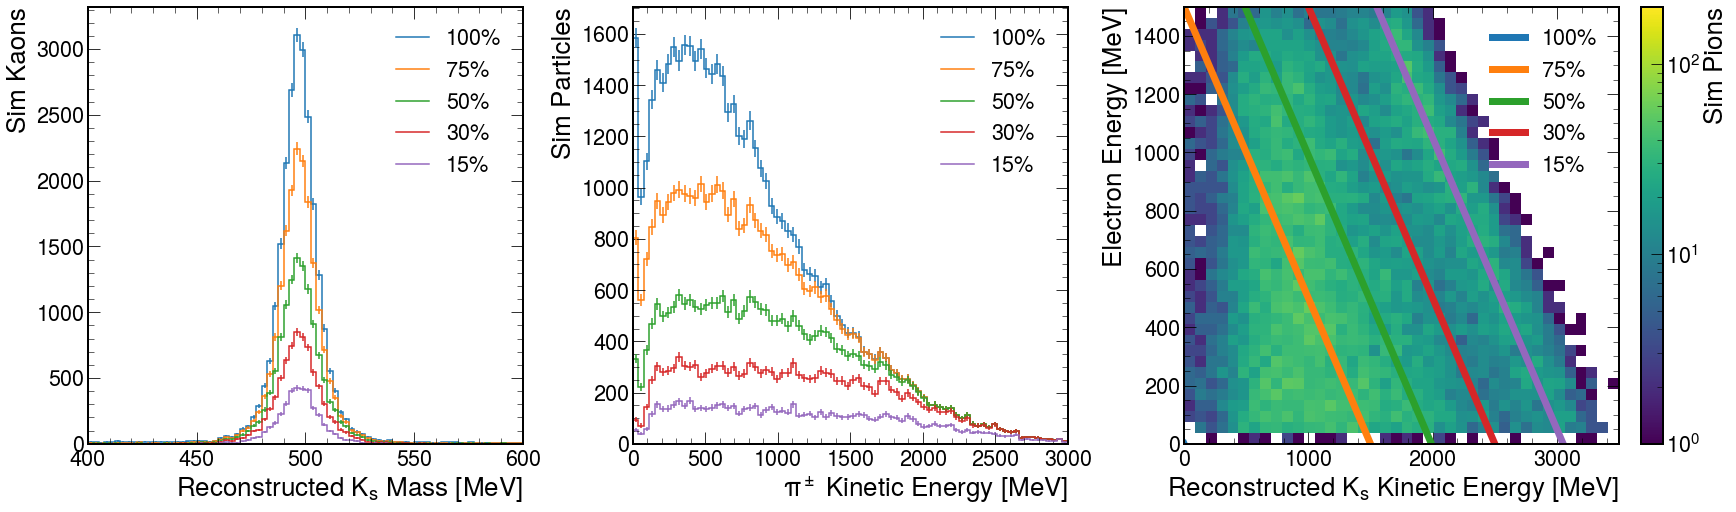

In [13]:
print(hists["pi_mass1"])
fig, ax = plt.subplots(1,3,figsize=(24,7), constrained_layout=True)

 #this is 100% of the data with theta cut
hist.plot1d(hists["pi_mass1"],ax=ax[0],clear=False);
hist.plot1d(hists["pi_mass5"],ax=ax[0],clear=False);
hist.plot1d(hists["pi_mass4"],ax=ax[0],clear=False);
hist.plot1d(hists["pi_mass3"],ax=ax[0],clear=False);
hist.plot1d(hists["pi_mass2"],ax=ax[0],clear=False);
#leg = ax[0].legend([r'$\theta _{dau1, dau2}$ < 40$^\circ$' ])
#ax[0].set_ylim(0, 4000)
leg = ax[0].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])

hist.plot1d(hists["pi_e1"],ax=ax[1],clear=False);
hist.plot1d(hists["pi_e5"],ax=ax[1],clear=False);
hist.plot1d(hists["pi_e4"],ax=ax[1],clear=False);
hist.plot1d(hists["pi_e3"],ax=ax[1],clear=False);
hist.plot1d(hists["pi_e2"],ax=ax[1],clear=False);
#ax[1].set_ylim(0, 3000)
leg = ax[1].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])

x = np.arange(0, 3250, 1)
hist.plot2d(hists["kaone_hist"], xaxis='k', ax=ax[2], patch_opts=POPTS);
line15 = -1* x + 3050
line30 = -1* x + 2500
line50 = -1* x + 1990
line75 = -1* x + 1500
line100 = -1*x

#ax[2].plot(x, lineouter, '-', color='C0', linewidth=7.0)
ax[2].plot(x, line100, '-', color='C0', linewidth=7.0)
ax[2].plot(x, line75, '-', color='C1', linewidth=7.0)
ax[2].plot(x, line50, '-', color='C2', linewidth=7.0)
ax[2].plot(x, line30, '-', color='C3', linewidth=7.0)
ax[2].plot(x, line15, '-', color='C4', linewidth=7.0)
leg = ax[2].legend([r'100%', r'75%', r'50%', r'30%', r'15%' ])

<Hist (k,e) instance at 0x127db7be0>
6259


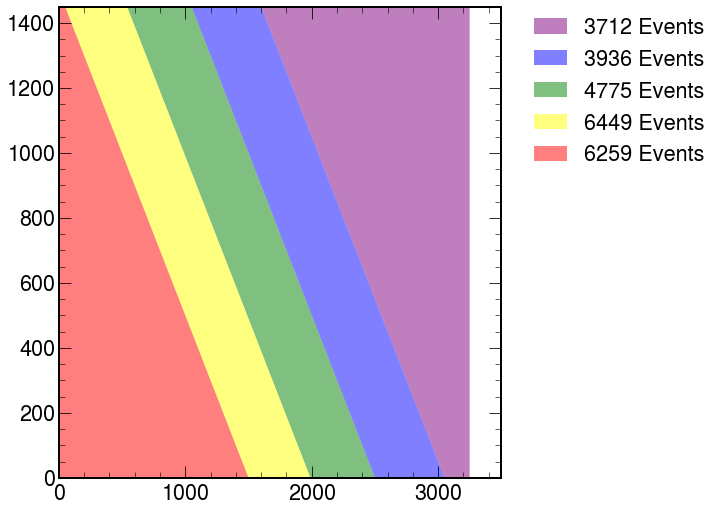

In [38]:
print(hists["kaone_hist"])
fig, ax = plt.subplots(figsize=(10,7), constrained_layout=True)


x = np.arange(0, 3250, 1)
#hist.plot2d(hists["kaone_hist"], xaxis='k', ax=ax, patch_opts=POPTS);
line15 = -1* x + 3050
line30 = -1* x + 2500
line50 = -1* x + 1990
line75 = -1* x + 1500
line100 = -1*x
line0 = -1.5* x + 100000

#ax[2].plot(x, lineouter, '-', color='C0', linewidth=7.0)
#ax.plot(x, line100, '-', color='C0', linewidth=7.0)
##ax.plot(x, line75, '-', color='C1', linewidth=7.0)
#ax.plot(x, line50, '-', color='C2', linewidth=7.0)
#ax.plot(x, line30, '-', color='C3', linewidth=7.0)
#ax.plot(x, line15, '-', color='C4', linewidth=7.0)
ax.fill_between(x, line0, line15, where=(line0 > line15), facecolor='purple', alpha=0.5)
ax.fill_between(x, line15, line30, where=(line15 > line30), facecolor='blue', alpha=0.5)
ax.fill_between(x, line30, line50, where=(line30 > line50), facecolor='green', alpha=0.5)
ax.fill_between(x, line50, line75, where=(line50 > line75), facecolor='yellow', alpha=0.5)
ax.fill_between(x, line75, line100, where=(line75 > line100), facecolor='red', alpha=0.5)

ax.set_xlim(0, 3500)
ax.set_ylim(0, 1450)


# Place a legend to the right of this smaller subplot.
leg = ax.legend([r'3712 Events ', r'3936 Events', r'4775 Events', r'6449 Events', r'6259 Events' ], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#leg = ax.legend([r'100%', r'75%', r'50%', r'30%', r'15%' ], loc = 'upper right', borderaxespad=0.)

# Total : [25131]
# Top 75% : [18872]
# Top 50% : [12423]
# Top 30% : [7648]
# Top 15% : [3712]

print(25131-18872)
